# Playing with Real Data: Tropical Storms html

Given an html file containing a table of tropical storm data, we would like to read the data into a dataframe using the power of pandas.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import io
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 16)
% matplotlib inline

The pandas method 'read_html' fails to translate the file we are using because the file source does not describe a table anywhere, so pandas doesn't understand how to parse it.

What we need to do is several type conversions to get us from bytes to a StringIO which can be read by pandas:

url -> response -> bytes -> navigablestring -> string -> stringIO -> dataframe

In [2]:
# url -> response:
html = requests.get('http://www-nwp/~frjh/tropicalcyclone/observations/unsort17.html')

# response -> bytes:
data = html.content

# bytes -> BeautifulSoup (???):
soup = BeautifulSoup(data, 'lxml')

In [3]:
# Beautiful Soup -> navigable string:
my_soup = soup.pre.string

# navigable string -> string -> stringIO:
f = io.StringIO(str(my_soup))

# stringIO -> dataframe:
raw_storms = pd.read_table(f, sep='\s+')

raw_storms

1999 XXXXXXXXX  XXX  9999  99  99.1  99.2  999 999.9N  999.9W  99X  999.1  \
1      1       01W  NWP  2017   1     7    18   20   8.4N  127.2E  01W    999   
1      1       01W  NWP  2017   1     8     0   25   9.0N  126.9E  01W    999   
1      1       01W  NWP  2017   1     8     6   25   9.4N  126.2E  01W    999   
1      1       01W  NWP  2017   1     8    12   30   9.6N  125.7E  01W    999   
1      1       01W  NWP  2017   1     8    18   30  10.3N  125.6E  01W    999   
1      1       01W  NWP  2017   1     9     0   25  10.5N  125.1E  01W    999   
1      1       01W  NWP  2017   1     9     6   20  10.4N  124.1E  01W    999   
1      1       01W  NWP  2017   1     9    12   20  10.2N  123.0E  01W    999   
..   ...       ...  ...   ...  ..   ...   ...  ...    ...     ...  ...    ...   
1     65     KATIA  NAT  2017   9     6    12   40  21.8N   96.1W  13L     30   
1     65     KATIA  NAT  2017   9     6    18   65  21.8N   95.2W  13L     43   
1     65     KATIA  NAT  2017   9     7     0   70  21.7N   94.9W  13L     30   
1     65     KATIA  NAT  2017   9     7     6   70  21.6N   94.6W  13L     40   
1     65     KATIA  NAT  2017   9     7    12   70  21.6N   94.6W  13L     38   
1     65     KATIA  NAT  2017   9     7    18   70  21.6N   94.6W  13L     38   
1     65     KATIA  NAT  2017   9     8     0   70  21.6N   95.0W  13L     48   
1     65     KATIA  NAT  2017   9     8     6   80  21.4N   95.3W  13L     48   

    999.2  999.3  999.4  999999  9999.1  
1     999    999    999  305011    1003  
1     999    999    999  310008    1003  
1     999    999    999  300008    1004  
1     999    999    999  290005    1001  
1     999    999    999  295004    1000  
1     999    999    999  290005    1004  
1     999    999    999  285007    1004  
1     999    999    999  285007    1005  
..    ...    ...    ...     ...     ...  
1     999    999    999  125003    1004  
1      23    999    999  110005     992  
1      14      9    999  105003     989  
1      14      9    999  110004     989  
1      14      9    999  360000     983  
1      14      9    999  360000     982  
1      19      9    999  265003     982  
1      19      9    999  255002     977  

[1107 rows x 17 columns]

## Clean-up

In [4]:
my_soup = soup.pre.string
f = io.StringIO(str(my_soup))

storms = pd.read_table(f, sep='\s+', names=["data_id", "USN",
                                                "name", "basin",
                                               "year", "month",
                                               "day", "hour",
                                               "max_wind", "lat",
                                               "long", "storm_id",
                                               "34_rd", "50_rad",
                                               "64_rad", "100_rad",
                                               "velocity", "MSLP"], skiprows=2)
storms

data_id  USN   name basin  year  month  day  hour  max_wind    lat  \
0           1    1    01W   NWP  2017      1    7    18        20   8.4N   
1           1    1    01W   NWP  2017      1    8     0        25   9.0N   
2           1    1    01W   NWP  2017      1    8     6        25   9.4N   
3           1    1    01W   NWP  2017      1    8    12        30   9.6N   
4           1    1    01W   NWP  2017      1    8    18        30  10.3N   
5           1    1    01W   NWP  2017      1    9     0        25  10.5N   
6           1    1    01W   NWP  2017      1    9     6        20  10.4N   
7           1    1    01W   NWP  2017      1    9    12        20  10.2N   
...       ...  ...    ...   ...   ...    ...  ...   ...       ...    ...   
1099        1   65  KATIA   NAT  2017      9    6    12        40  21.8N   
1100        1   65  KATIA   NAT  2017      9    6    18        65  21.8N   
1101        1   65  KATIA   NAT  2017      9    7     0        70  21.7N   
1102        1   65  KATIA   NAT  2017      9    7     6        70  21.6N   
1103        1   65  KATIA   NAT  2017      9    7    12        70  21.6N   
1104        1   65  KATIA   NAT  2017      9    7    18        70  21.6N   
1105        1   65  KATIA   NAT  2017      9    8     0        70  21.6N   
1106        1   65  KATIA   NAT  2017      9    8     6        80  21.4N   

        long storm_id  34_rd  50_rad  64_rad  100_rad  velocity  MSLP  
0     127.2E      01W    999     999     999      999    305011  1003  
1     126.9E      01W    999     999     999      999    310008  1003  
2     126.2E      01W    999     999     999      999    300008  1004  
3     125.7E      01W    999     999     999      999    290005  1001  
4     125.6E      01W    999     999     999      999    295004  1000  
5     125.1E      01W    999     999     999      999    290005  1004  
6     124.1E      01W    999     999     999      999    285007  1004  
7     123.0E      01W    999     999     999      999    285007  1005  
...      ...      ...    ...     ...     ...      ...       ...   ...  
1099   96.1W      13L     30     999     999      999    125003  1004  
1100   95.2W      13L     43      23     999      999    110005   992  
1101   94.9W      13L     30      14       9      999    105003   989  
1102   94.6W      13L     40      14       9      999    110004   989  
1103   94.6W      13L     38      14       9      999    360000   983  
1104   94.6W      13L     38      14       9      999    360000   982  
1105   95.0W      13L     48      19       9      999    265003   982  
1106   95.3W      13L     48      19       9      999    255002   977  

[1107 rows x 18 columns]

In [5]:
new_array = []
for val in storms['lat']:
    if val.endswith('N'):
        newvaln = val.strip('N')
        #print(newvaln)
        num_val = float(newvaln)
        new_array.append(num_val)
    elif val.endswith('S'):
        newvals = val.strip('S')
        newvals = '-' + newvals
        #print(newvals)
        num_val = float(newvals)
        new_array.append(num_val)        
#print(new_array)

In [6]:
storms['lat'] = new_array

In [7]:
storms

data_id  USN   name basin  year  month  day  hour  max_wind   lat  \
0           1    1    01W   NWP  2017      1    7    18        20   8.4   
1           1    1    01W   NWP  2017      1    8     0        25   9.0   
2           1    1    01W   NWP  2017      1    8     6        25   9.4   
3           1    1    01W   NWP  2017      1    8    12        30   9.6   
4           1    1    01W   NWP  2017      1    8    18        30  10.3   
5           1    1    01W   NWP  2017      1    9     0        25  10.5   
6           1    1    01W   NWP  2017      1    9     6        20  10.4   
7           1    1    01W   NWP  2017      1    9    12        20  10.2   
...       ...  ...    ...   ...   ...    ...  ...   ...       ...   ...   
1099        1   65  KATIA   NAT  2017      9    6    12        40  21.8   
1100        1   65  KATIA   NAT  2017      9    6    18        65  21.8   
1101        1   65  KATIA   NAT  2017      9    7     0        70  21.7   
1102        1   65  KATIA   NAT  2017      9    7     6        70  21.6   
1103        1   65  KATIA   NAT  2017      9    7    12        70  21.6   
1104        1   65  KATIA   NAT  2017      9    7    18        70  21.6   
1105        1   65  KATIA   NAT  2017      9    8     0        70  21.6   
1106        1   65  KATIA   NAT  2017      9    8     6        80  21.4   

        long storm_id  34_rd  50_rad  64_rad  100_rad  velocity  MSLP  
0     127.2E      01W    999     999     999      999    305011  1003  
1     126.9E      01W    999     999     999      999    310008  1003  
2     126.2E      01W    999     999     999      999    300008  1004  
3     125.7E      01W    999     999     999      999    290005  1001  
4     125.6E      01W    999     999     999      999    295004  1000  
5     125.1E      01W    999     999     999      999    290005  1004  
6     124.1E      01W    999     999     999      999    285007  1004  
7     123.0E      01W    999     999     999      999    285007  1005  
...      ...      ...    ...     ...     ...      ...       ...   ...  
1099   96.1W      13L     30     999     999      999    125003  1004  
1100   95.2W      13L     43      23     999      999    110005   992  
1101   94.9W      13L     30      14       9      999    105003   989  
1102   94.6W      13L     40      14       9      999    110004   989  
1103   94.6W      13L     38      14       9      999    360000   983  
1104   94.6W      13L     38      14       9      999    360000   982  
1105   95.0W      13L     48      19       9      999    265003   982  
1106   95.3W      13L     48      19       9      999    255002   977  

[1107 rows x 18 columns]

In [8]:
new_array_longs = []
for val in storms['long']:
    if val.endswith('E'):
        newvale = val.strip('E')
        #print(newvaln)
        num_val = float(newvale)
        new_array_longs.append(num_val)
    elif val.endswith('W'):
        newvalw = val.strip('W')
        newvalw = '-' + newvalw
        #print(newvals)
        num_val = float(newvalw)
        new_array_longs.append(num_val)        
#print(new_array_longs)

In [9]:
storms['long'] = new_array_longs
storms

data_id  USN   name basin  year  month  day  hour  max_wind   lat  \
0           1    1    01W   NWP  2017      1    7    18        20   8.4   
1           1    1    01W   NWP  2017      1    8     0        25   9.0   
2           1    1    01W   NWP  2017      1    8     6        25   9.4   
3           1    1    01W   NWP  2017      1    8    12        30   9.6   
4           1    1    01W   NWP  2017      1    8    18        30  10.3   
5           1    1    01W   NWP  2017      1    9     0        25  10.5   
6           1    1    01W   NWP  2017      1    9     6        20  10.4   
7           1    1    01W   NWP  2017      1    9    12        20  10.2   
...       ...  ...    ...   ...   ...    ...  ...   ...       ...   ...   
1099        1   65  KATIA   NAT  2017      9    6    12        40  21.8   
1100        1   65  KATIA   NAT  2017      9    6    18        65  21.8   
1101        1   65  KATIA   NAT  2017      9    7     0        70  21.7   
1102        1   65  KATIA   NAT  2017      9    7     6        70  21.6   
1103        1   65  KATIA   NAT  2017      9    7    12        70  21.6   
1104        1   65  KATIA   NAT  2017      9    7    18        70  21.6   
1105        1   65  KATIA   NAT  2017      9    8     0        70  21.6   
1106        1   65  KATIA   NAT  2017      9    8     6        80  21.4   

       long storm_id  34_rd  50_rad  64_rad  100_rad  velocity  MSLP  
0     127.2      01W    999     999     999      999    305011  1003  
1     126.9      01W    999     999     999      999    310008  1003  
2     126.2      01W    999     999     999      999    300008  1004  
3     125.7      01W    999     999     999      999    290005  1001  
4     125.6      01W    999     999     999      999    295004  1000  
5     125.1      01W    999     999     999      999    290005  1004  
6     124.1      01W    999     999     999      999    285007  1004  
7     123.0      01W    999     999     999      999    285007  1005  
...     ...      ...    ...     ...     ...      ...       ...   ...  
1099  -96.1      13L     30     999     999      999    125003  1004  
1100  -95.2      13L     43      23     999      999    110005   992  
1101  -94.9      13L     30      14       9      999    105003   989  
1102  -94.6      13L     40      14       9      999    110004   989  
1103  -94.6      13L     38      14       9      999    360000   983  
1104  -94.6      13L     38      14       9      999    360000   982  
1105  -95.0      13L     48      19       9      999    265003   982  
1106  -95.3      13L     48      19       9      999    255002   977  

[1107 rows x 18 columns]

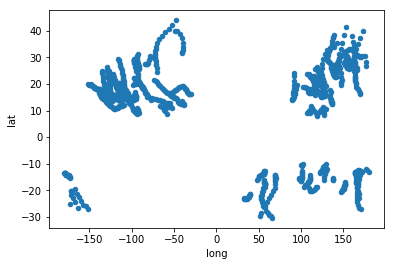

In [10]:
storms.plot(x='long', y='lat', kind='scatter')